# Import Statements

In [14]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Train and Validation Split

In [15]:
#Pass the percentage of data you need for test like 20 % 
def train_split(df,test_per):
    indices=df.index.tolist()
    test_size=round(len(df)*(test_per/100))
    random.seed(0)
    test_indices=random.sample(population=indices,k=test_size)
    valid_df=df.loc[test_indices]
    train_df=df.drop(test_indices)
    return train_df,valid_df

# Cost function

In [16]:
def cost_function(X, Y, B):
    #Cost function J=(1/2m)*(sum(pow(hypothesis(xi) - (yi)),2)) #hypothesis=X.T*B as X=data.T
    m = len(Y)
    J=0
    for i in range(0,m):
        x=X[i]
        y=Y[i]
        hypothesis=x.dot(B)
        J+=(pow(hypothesis-y,2))
    J/=(2*m)
    return J

# Gradient descent

In [17]:
def gradient_descent(X,Y,B,alpha,prev_cost):
    #formula: Bj=Bj-alpha*((hypothesis(x)-y)*xj)
    m=len(Y)
    for j in range(0,len(B)):
        sum=0
        gradient=1
        for i in range(0,m):
            x=X[i]
            y=Y[i]
            hypothesis=x.dot(B)
            sum+=(hypothesis-y)*x[j]
        gradient=sum/m
        #update B
        B[j]-=alpha*gradient
    cost=cost_function(X,Y,B)
#     print(prev_cost,cost)
    if(abs(prev_cost - cost) <  0.000001):
        return B,cost
    else:
        B,cost=gradient_descent(X,Y,B,alpha,cost)
    return B,cost

# Prediction

In [18]:
def predict(x,B):
    ans=x.dot(B)
    return ans

In [19]:
def cal_error(X,Y,B,title):
    actual_list=[]
    predicted_list=[]
    m=len(Y)
    MSE=0
    MAE=0
    MPE=0
    for i in range(0,len(X)):
        actual=Y[i]
        predicted=predict(X[i],B)
        actual_list.append(actual)
        predicted_list.append(predicted)
        MSE+=pow((actual-predicted),2)
        MAE+=abs(actual-predicted)
        MPE+=MAE/actual*1    
    MSE/=m
    MAE/=m
    MPE/=m
    plot_linearreg(actual_list,predicted_list,title)
    return MSE,MAE,MPE,actual_list,predicted_list

In [20]:
def plot_linearreg(actual_list,predicted_list,title):
    x_labels=[]
    for i in range(len(actual_list)):      #oddnumbers
        x_labels.append(i)
        
    area=np.pi
    plt.xlabel("Students")
    plt.ylabel("Chance of Admit")
    plt.title(title)

    plt.scatter(x_labels, predicted_list, s=area, c='blue', alpha=0.5)
    plt.scatter(x_labels, actual_list, s=area, c='red', alpha=0.5)

    plt.show()
    return

# Residual plots

#Question 3:
Analyse and report the behaviour of the coefficients

In One variable Linear Regression,we have 2 coefficients b0,b1
In this case b0 is the y-intercept and b1 is the slope of the line that determines the linear regression

In Multi variable Linear Regression,if we have n features we will have n+1 coefficients (b0,b1,b2,...,bn)

The value of coefficients means the weightage the feature has on the value of predictions.
The sign of coefficient tells whether the value of prediction is increased(+) or decreased(-) by the feature.

The residual plots are drawn below for features GRE Score , TOEFL Score , CGPA

In [21]:
def residual_plot(header,train_df,actual_list,predicted_list,B):
    for i in (1,2,6):  #for features-GRE Score , TOEFL Score , CGPA
        print(header[i])
        print("Value of coefficient-",B[i])
        x_labels=(train_df[header[i]].values)
        y_labels=[]
        for j in range(0,len(x_labels)):
            y_labels.append(actual_list[j]-predicted_list[j])
        area=np.pi
        plt.xlabel("Fitted Values")
        plt.ylabel("Residuals")
        title=("Residual plot-%s"%header[i])
        plt.title(title)
        plt.scatter(x_labels, y_labels, s=area, c='blue', alpha=0.5)
        plt.show()
    return
        

# Helper functions

In [22]:
#Creating X(data.T),Y arrays from df
def to_arrays(df,label):
    no_rows,no_cols=df.shape
    header=list(df.columns)
    data_array=np.ones((no_cols-1,no_rows))
    X0=np.ones(no_rows)                      #X0=1
    for i in range(0,no_cols-1):             #Removing first col-serial no , last col-label
        if(i == 0):
            data_array[i]=X0
        else:
            x=df[header[i]].values
            data_array[i]=x
            #data_array[i]=mean_normalize(x)
    X=data_array.T        #Doing Transpose

    #Y (output) array
    Y=np.array(df[label].values)
    
    return X,Y

In [23]:
def mean_normalize(x):
    x_new=np.ones(len(x))
    mean=np.mean(x)
    max=np.amax(x)
    for i in range(0,len(x)):
        x_new[i]=(x[i]-mean)/(max)
    return x_new

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def scikit_linearregression(train_X,train_Y,valid_X,valid_Y):

    # Model Intialization
    reg = LinearRegression()
    # Data Fitting
    reg = reg.fit(train_X,train_Y)
    # Y Prediction
    Y_pred = reg.predict(valid_X)
    #print(Y_pred)

    # Model Evaluation
    mse = mean_squared_error(valid_Y, Y_pred)
    print("Mean Square Error -",mse)
    mae = mean_absolute_error(valid_Y, Y_pred)
    print("Mean Absolute Error -",mae)


# # Main

In [25]:
def main():
    k=3
    file="AdmissionDataset/data.csv"
    label='Chance of Admit '
    no_coefficients=8  #[B0,B1,B2,...,B7] also 7 columns but X0=1
    
    df=pd.read_csv(file)
    header=list(df.columns)
   
    train_df,valid_df=train_split(df,20)
    
    #Training
    train_X,train_Y=to_arrays(train_df,label)
    
    #B(beta) array of coefficients
    #Initialized to zero
    B = np.zeros(no_coefficients)

    alpha = 0.000001
        
    init_J=cost_function(train_X,train_Y,B)
    #print("Initial_cost- ",init_J)
    
    B,final_J=gradient_descent(train_X,train_Y,B,alpha,init_J)
    #print("Final_cost- ",final_J)
    #print(B)
    
    #Linear Regression Plot
    print("------Training--------")
    MSE,MAE,MPE,actual_list,predicted_list=cal_error(train_X,train_Y,B,"Linear Regression-Training")
    print("Mean Square Error-",MSE)
    print("Mean Absolute Error-",MAE)
    print("Mean Absolute Percentage Error-",MPE)
    
    #Question-Part3
    print("-----Residual Plots-------\n")
    residual_plot(header,train_df,actual_list,predicted_list,B)
    
    #Prediction
    valid_X,valid_Y=to_arrays(valid_df,label)
    print("\n\n-------Prediction------")
    MSE,MAE,MPE,_,_=cal_error(valid_X,valid_Y,B,"Linear Regression-Validation")
    print("Mean Square Error-",MSE)
    print("Mean Absolute Error-",MAE)
    print("Mean Absolute Percentage Error-",MPE)
    
    print("Using Scikit")
    scikit_linearregression(train_X,train_Y,valid_X,valid_Y)
    
    return

------Training--------


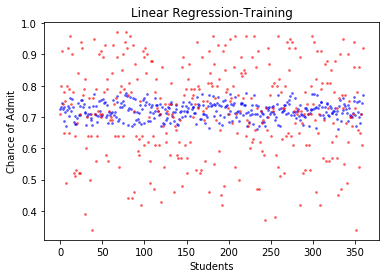

Mean Square Error- 0.014521103735361394
Mean Absolute Error- 0.09584442137741643
Mean Absolute Percentage Error- 25.253716686602967
-----Residual Plots-------

GRE Score
Value of coefficient- 0.0020569618220524243


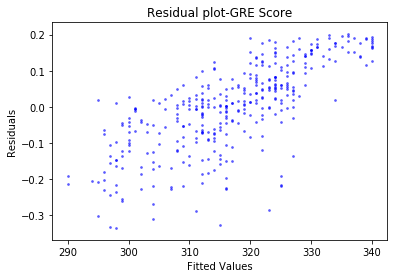

TOEFL Score
Value of coefficient- 0.000634646652603971


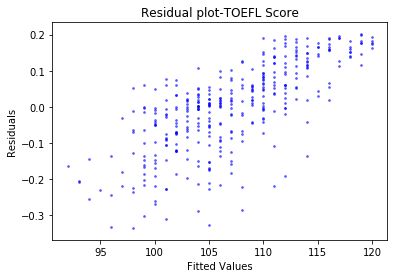

CGPA
Value of coefficient- 5.115380468255175e-05


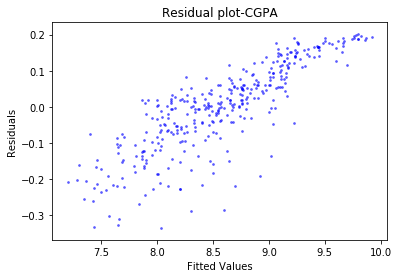



-------Prediction------


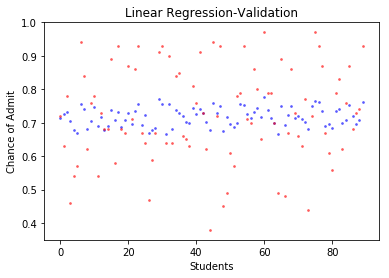

Mean Square Error- 0.014159234105343301
Mean Absolute Error- 0.09677817068322561
Mean Absolute Percentage Error- 6.235827388303856
Using Scikit
Mean Square Error - 0.0035076322300100753
Mean Absolute Error - 0.04454092036310328


In [26]:
if __name__ == "__main__":
    main()